In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [13]:
# Importing the listing dataset
listingsDF = pd.read_csv('listings.csv')
listingsDF.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
# Certain textual variables were extracted into a dataframe
listingDF = listingsDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]
listingDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,NaN,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,-122.369279,47.638473,NaN,A charming apartment that sits atop Queen Anne...,f,NaN,West Queen Anne,...,Entire home/apt,3,1.0,0.0,2.0,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,$450.00


In [15]:
# Replace NaN values with 0
listingDF.fillna(0, inplace=True)

# Extract prices from listingDF into priceDF
priceDF = listingDF['price']
# Create an empty prices list
prices=[]

# Convert prices from listingDF into float values and append it in prices list
for p in priceDF:
    p = float(p[1:].replace(',',''))
    prices.append(p)
    
# Replace the price column in the original listingDF with the new prices
listingDF['price'] = prices

# Remove listings with 0 for  bedrooms, bathrooms, accomodates, price, beds, review_scores_rating, reviews_per_month
listingDF = listingDF[listingDF.bedrooms > 0]
listingDF = listingDF[listingDF.bathrooms > 0]
listingDF = listingDF[listingDF.accommodates > 0]
listingDF = listingDF[listingDF.price > 0]
listingDF = listingDF[listingDF.beds > 0]
listingDF = listingDF[listingDF.review_scores_rating > 0]
listingDF = listingDF[listingDF.reviews_per_month > 0]

listingDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,0,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,0,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,85.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,150.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,975.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,450.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,-122.366174,47.630525,If you include a bit of your background in you...,We're renting out a small private unit of one ...,f,This part of Queen Anne has wonderful views an...,West Queen Anne,...,Private room,2,1.0,1.0,1.0,2.45,"{""Wireless Internet"",""Free Parking on Premises...",strict,17,120.0


In [17]:
# Creating a dataframe of the summaries of the 100 most expensive listings
summaryDF = listingDF[['summary','price']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('price',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

,summary,price
3122,2 bedroom fully finished basement apartment wi...,1000.0
1208,100% Walk Score close to the Convention Center...,999.0
2,New modern house built in 2013. Spectacular s...,975.0
3443,Beautiful home that is located quiet neighborh...,950.0
1279,Fully updated by professional interior designe...,899.0


In [19]:
from nltk.corpus import stopwords
import string
import nltk

# Some data cleaning

words=''
for index,row in top100DF.iterrows():
    words += row['summary']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'bedroom fully finished basement apartment separate'

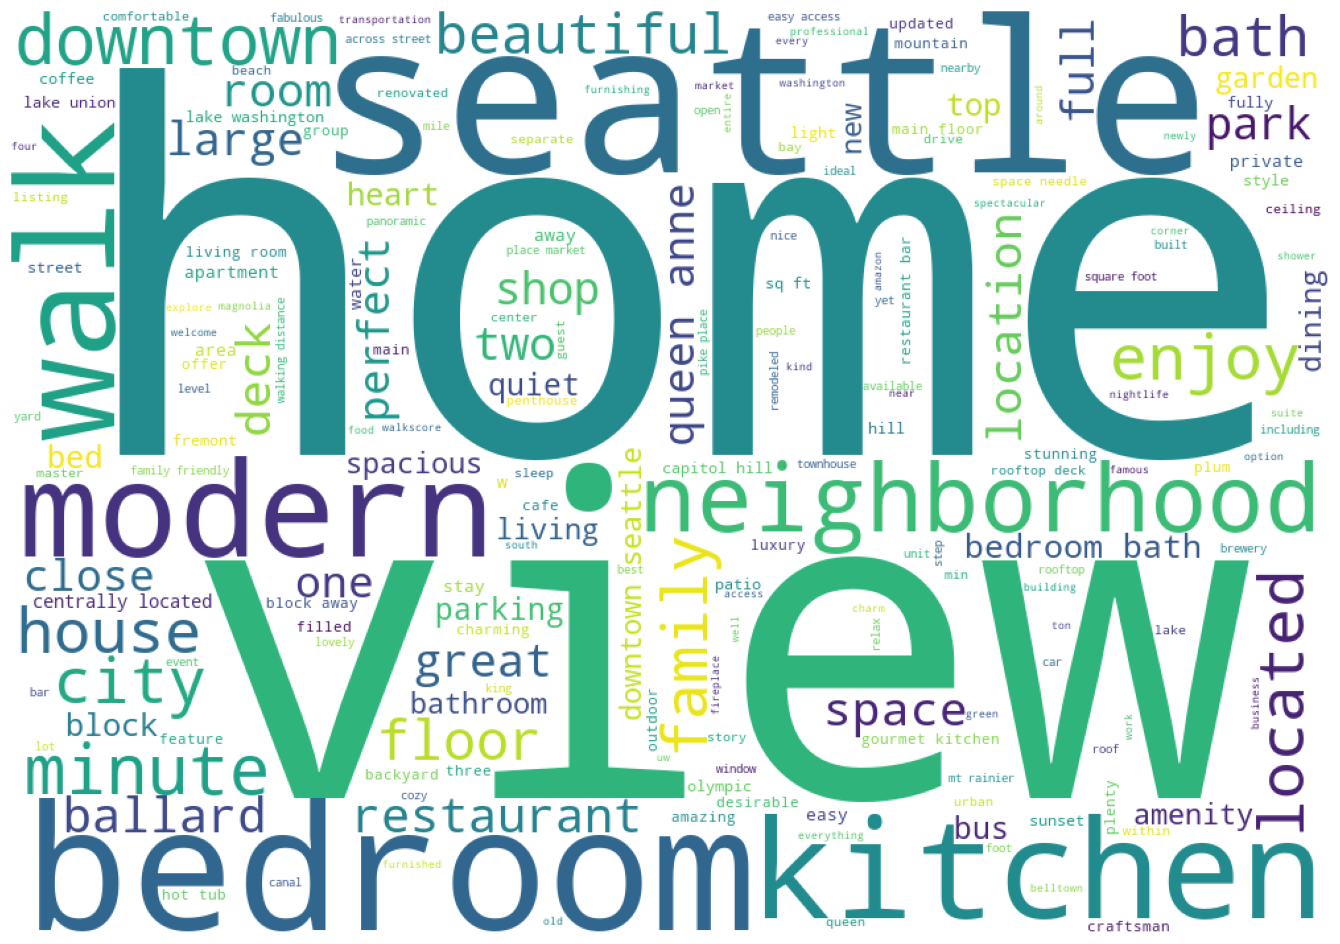

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
# Creating a dataframe of the summaries of the 100 most cheapest listings
summaryLowDF = listingDF[['summary','price']]
summaryLowDF = summaryLowDF[pd.notnull(summaryLowDF['summary'])]
summaryLowDF = summaryLowDF[summaryLowDF['summary']!=0]
summarLowyDF = summaryLowDF.sort_values('price',ascending=[1])
bot100DF = summaryLowDF.head(100)
bot100DF.sample(n=5)

,summary,price
112,This listing is located in the middle of Balla...,200.0
30,Enjoy your own 1 BR cottage atop Queen Anne hi...,175.0
27,Micro camper with queen size bed and seating f...,45.0
82,Located in the Sunset Hill/Ballard Area of Sea...,125.0
109,2 bedroom & 2 bathroom comfortable and private...,135.0


In [25]:
# Some data cleaning

words=''
for index,row in bot100DF.iterrows():
    words += row['summary']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

"chemically sensitive 've removed irritant triggeri"

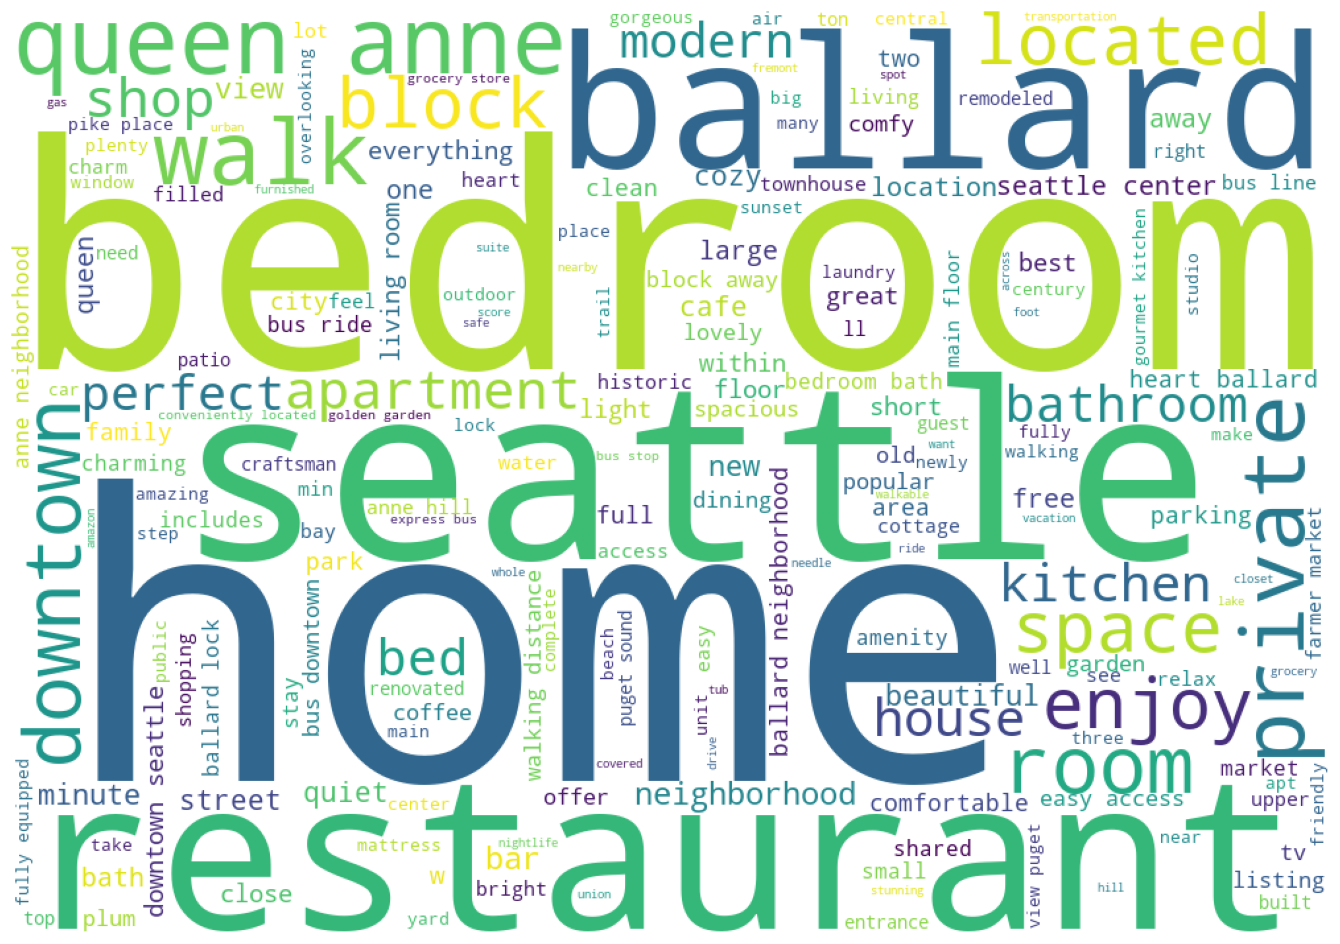

In [27]:
wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [31]:
reviewsDF = pd.read_csv("reviews.csv")
reviewsDF = reviewsDF.dropna()
reviewsDF.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [35]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sarish/nltk_data...


True

In [37]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Initialize new columns in the DataFrame
reviewsDF['polarity_value'] = "Default"
reviewsDF['neg'] = 0.0
reviewsDF['pos'] = 0.0
reviewsDF['neu'] = 0.0
reviewsDF['compound'] = 0.0

# Loop through each row and calculate sentiment scores
for index, row in reviewsDF.iterrows():
    ss = sid.polarity_scores(row['comments'])
    
    # Update the DataFrame with sentiment scores
    reviewsDF.at[index, 'polarity_value'] = ss
    reviewsDF.at[index, 'neg'] = ss['neg']
    reviewsDF.at[index, 'pos'] = ss['pos']
    reviewsDF.at[index, 'neu'] = ss['neu']
    reviewsDF.at[index, 'compound'] = ss['compound']

# Display the updated DataFrame
reviewsDF.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sarish/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.000,0.538,0.462,0.7901
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.000,0.391,0.609,0.9872
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...","{'neg': 0.043, 'neu': 0.772, 'pos': 0.185, 'co...",0.043,0.185,0.772,0.8718
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,"{'neg': 0.035, 'neu': 0.765, 'pos': 0.2, 'comp...",0.035,0.200,0.765,0.8313
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,"{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'comp...",0.000,0.345,0.655,0.9783


In [39]:
reviewsDF.to_csv('previews.csv')

In [43]:
pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=93f40e0f39ba1e11f293e09856e285c48168e1bf58686f221ce9afbd173c09e7
  Stored in directory: /Users/sarish/Library/Caches/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [45]:
# Install langdetect if not already installed
# !pip install langdetect  # Uncomment this line if running in a local environment

from langdetect import detect
import pandas as pd

# Function to detect the language of a comment
def detect_lang(sente):
    sente = str(sente)
    try:
        return detect(sente)
    except:
        return "None"  # Return None if detection fails

# Add a 'language' column to the DataFrame and detect language for each comment
reviewsDF['language'] = reviewsDF['comments'].apply(detect_lang)

# Filter DataFrame to include only English comments
EngReviewsDF = reviewsDF[reviewsDF['language'] == 'en']

# Display the first two rows of the filtered DataFrame
EngReviewsDF.head(2)


,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound,language
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.0,0.538,0.462,0.7901,en
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.0,0.391,0.609,0.9872,en


In [49]:
import numpy as np
import pandas as pd

# Assuming EngReviewsDF['pos'] is already present
polarDF = EngReviewsDF[['pos']]

# Group by the 'pos' score in 0.1 intervals
polarDF = polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()

# Rename columns and reset index
polarDF = polarDF.rename(columns={'pos': 'count_of_Comments'})
polarDF = polarDF.reset_index()
polarDF = polarDF.rename(columns={'pos': 'range_i'})

# Iterate over rows to modify 'RANGE' and 'Sentiment'
for i, r in polarDF.iterrows():
    # Extract and process the range interval and sentiment
    polarDF.at[i, 'RANGE'] = float(str(r['range_i'])[1:4].replace(',', ''))
    polarDF.at[i, 'Sentiment'] = 'positive'

# Remove the 'range_i' column
del polarDF['range_i']

# Display the DataFrame
polarDF.head()


/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_53960/1750386166.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  polarDF = polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()


,count_of_Comments,RANGE,Sentiment
0,1655,0.0,positive
1,14094,0.1,positive
2,29158,0.2,positive
3,22304,0.3,positive
4,9894,0.4,positive


In [53]:
import numpy as np
import pandas as pd

# Assuming EngReviewsDF['neg'] is already present
polarDFneg = EngReviewsDF[['neg']]

# Group by the 'neg' score in 0.1 intervals
polarDFneg = polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()

# Rename columns and reset index
polarDFneg = polarDFneg.rename(columns={'neg': 'count_of_Comments'})
polarDFneg = polarDFneg.reset_index()
polarDFneg = polarDFneg.rename(columns={'neg': 'range_i'})

# Iterate over rows to modify 'RANGE' and 'Sentiment'
for i, r in polarDFneg.iterrows():
    polarDFneg.at[i, 'RANGE'] = float(str(r['range_i'])[1:4].replace(',', ''))
    polarDFneg.at[i, 'Sentiment'] = 'negative'

# Remove the 'range_i' column
del polarDFneg['range_i']

# Append rows from polarDFneg to polarDF
polarDF = pd.concat([polarDF, polarDFneg[['count_of_Comments', 'RANGE', 'Sentiment']]], ignore_index=True)

# Display the DataFrame
polarDF.head()


/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_53960/505729784.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  polarDFneg = polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()


,count_of_Comments,RANGE,Sentiment
0,1655,0.0,positive
1,14094,0.1,positive
2,29158,0.2,positive
3,22304,0.3,positive
4,9894,0.4,positive


In [57]:
import numpy as np
import pandas as pd

# Assuming EngReviewsDF['neu'] is already present
polarDFnut = EngReviewsDF[['neu']]

# Group by the 'neu' score in 0.1 intervals
polarDFnut = polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.1, 0.1))).count()

# Rename columns and reset index
polarDFnut = polarDFnut.rename(columns={'neu': 'count_of_Comments'})
polarDFnut = polarDFnut.reset_index()
polarDFnut = polarDFnut.rename(columns={'neu': 'range_i'})

# Iterate over rows to modify 'RANGE' and 'Sentiment'
for i, r in polarDFnut.iterrows():
    polarDFnut.at[i, 'RANGE'] = float(str(r['range_i'])[1:4].replace(',', ''))
    polarDFnut.at[i, 'Sentiment'] = 'neutral'

# Remove the 'range_i' column
del polarDFnut['range_i']

# Append rows from polarDFnut to polarDF
polarDF = pd.concat([polarDF, polarDFnut[['count_of_Comments', 'RANGE', 'Sentiment']]], ignore_index=True)

# Display the DataFrame
polarDFnut.head()


/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_53960/497823422.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  polarDFnut = polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.1, 0.1))).count()


,count_of_Comments,RANGE,Sentiment
0,7,0.0,neutral
1,156,0.1,neutral
2,567,0.2,neutral
3,1349,0.3,neutral
4,3861,0.4,neutral


<Figure size 1000x1000 with 0 Axes>

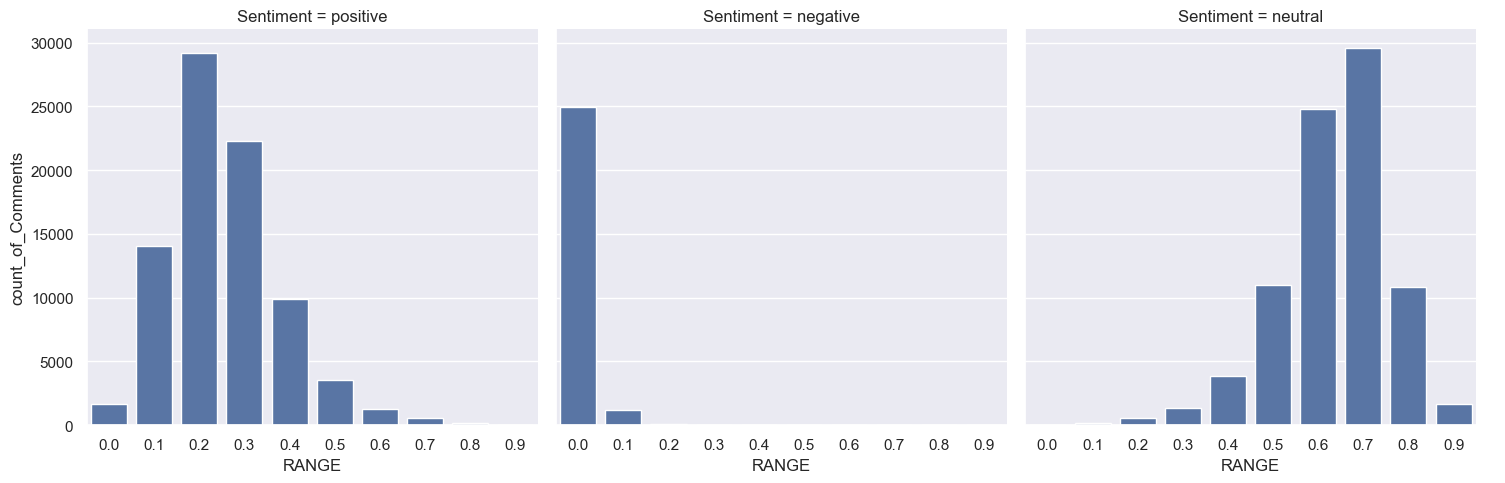

In [61]:
import matplotlib.pyplot as plt
import seaborn as sb

# Set the figure size
plt.figure(figsize=(10, 10))

# Create a categorical plot
sb.catplot(data=polarDF, x="RANGE", y="count_of_Comments", col="Sentiment", kind="bar", height=5)

# Show the plot
plt.show()


Text(0, 0.5, 'Number of reviews')

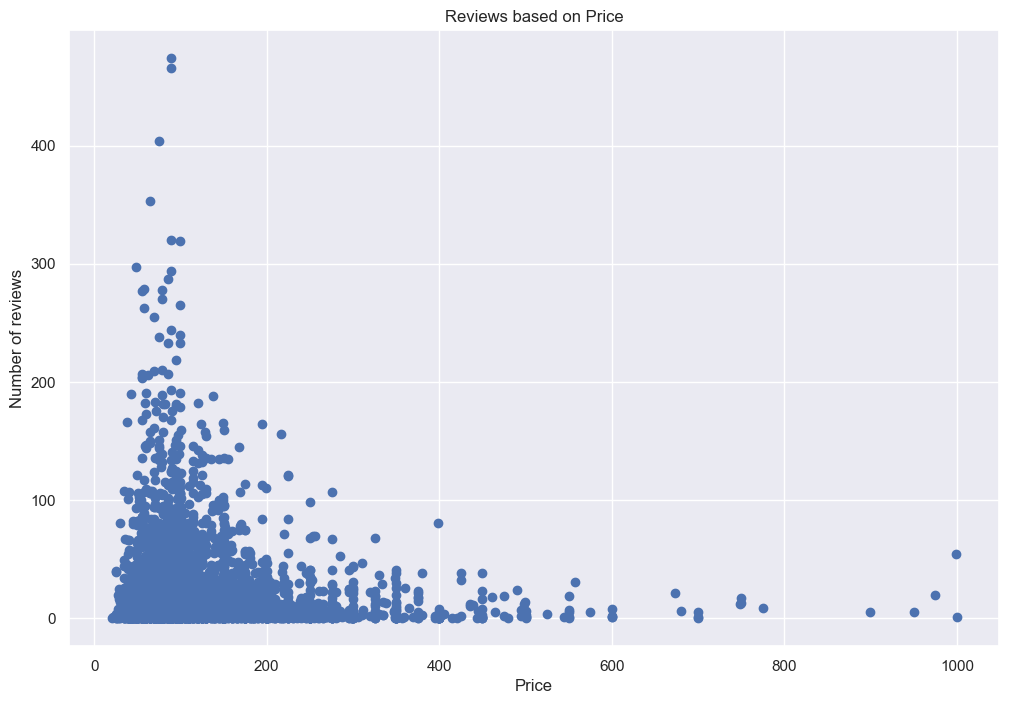

In [65]:
inputDF = pd.read_csv('listings.csv')
inputDF=inputDF[['number_of_reviews','price','review_scores_rating']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

price_review = inputDF[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("Price")
plt.ylabel("Number of reviews")

<Axes: >

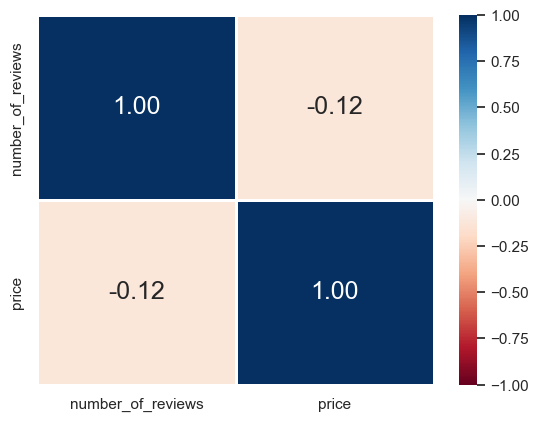

In [67]:
sb.heatmap(price_review.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")